# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 101 | Advanced Representation and Reasoning
- **Topic:** Module 3.0: Dynamic Systems and Markov Models
- **Due date:** N/A

# **`Laboratory Exercise #7: Advanced Probabilistic Models`**

In [ ]:
#@title # **`Exercise 1: Setting Up the Environment`**

# Objective: Prepare your Python environment and install the required libraries.

# Install required libraries
!pip install pgmpy matplotlib networkx

# Import necessary libraries
import numpy as np
import pandas as pd
from pgmpy.models import DynamicBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import DBNInference
import matplotlib.pyplot as plt
import networkx as nx

print("Environment setup complete. All required libraries have been installed and imported.")

In [ ]:
#@title # **`Exercise 2: Building a Simple DBN`**

# Objective: Create a Dynamic Bayesian Network (DBN) to model sequential data.

# Define the DBN model
dbn = DynamicBayesianNetwork()

# Add nodes to the model
dbn.add_nodes_from(['Rain', 'Sprinkler'])

# Add edges (intra-time and inter-time dependencies)
dbn.add_edges_from([
    (('Rain', 0), ('Sprinkler', 0)),
    (('Rain', 0), ('Rain', 1)),
    (('Sprinkler', 0), ('Sprinkler', 1))
])

# Define Conditional Probability Tables (CPTs)
# CPT for Rain at time t
rain_cpt = TabularCPD(('Rain', 0), variable_card=2, values=[[0.8], [0.2]])

# CPT for Sprinkler at time t
sprinkler_cpt = TabularCPD(('Sprinkler', 0), variable_card=2,
                           values=[[0.9, 0.4], [0.1, 0.6]],
                           evidence=[('Rain', 0)], evidence_card=[2])

# CPT for Rain at time t+1
rain_t1_cpt = TabularCPD(('Rain', 1), variable_card=2,
                         values=[[0.7, 0.3], [0.3, 0.7]],
                         evidence=[('Rain', 0)], evidence_card=[2])

# CPT for Sprinkler at time t+1
sprinkler_t1_cpt = TabularCPD(('Sprinkler', 1), variable_card=2,
                              values=[[0.8, 0.3, 0.6, 0.1],
                                      [0.2, 0.7, 0.4, 0.9]],
                              evidence=[('Rain', 1), ('Sprinkler', 0)],
                              evidence_card=[2, 2])

# Add CPTs to the model
dbn.add_cpds(rain_cpt, sprinkler_cpt, rain_t1_cpt, sprinkler_t1_cpt)

# Check if the model is valid
if dbn.check_model():
    print("The Dynamic Bayesian Network has been successfully created and is valid.")
else:
    print("There is an issue with the Dynamic Bayesian Network model.")

The Dynamic Bayesian Network has been successfully created and is valid.


In [ ]:
#@title # **`Exercise 3: Performing Inference`**

# Objective: Query the DBN model to predict the probabilities of future states.

# Create an inference object
dbn_inf = DBNInference(dbn)

# Query the DBN for probabilities of future states given initial evidence
evidence = {('Rain', 0): 0, ('Sprinkler', 0): 1}  # 0: False, 1: True
query_variable = ('Sprinkler', 1)

# Perform inference
result = dbn_inf.forward_inference([query_variable], evidence)

# Print the inference results
print(f"Probability of {query_variable} given evidence {evidence}:")
print(result[query_variable].values)

# Interpret the results
prob_sprinkler_on = result[query_variable].values[1]
print(f"\nThe probability that the sprinkler will be on in the next time step is {prob_sprinkler_on:.2f}")
print(f"The probability that the sprinkler will be off in the next time step is {1-prob_sprinkler_on:.2f}")

Probability of ('Sprinkler', 1) given evidence {('Rain', 0): 0, ('Sprinkler', 0): 1}:
[0.24 0.76]

The probability that the sprinkler will be on in the next time step is 0.76
The probability that the sprinkler will be off in the next time step is 0.24


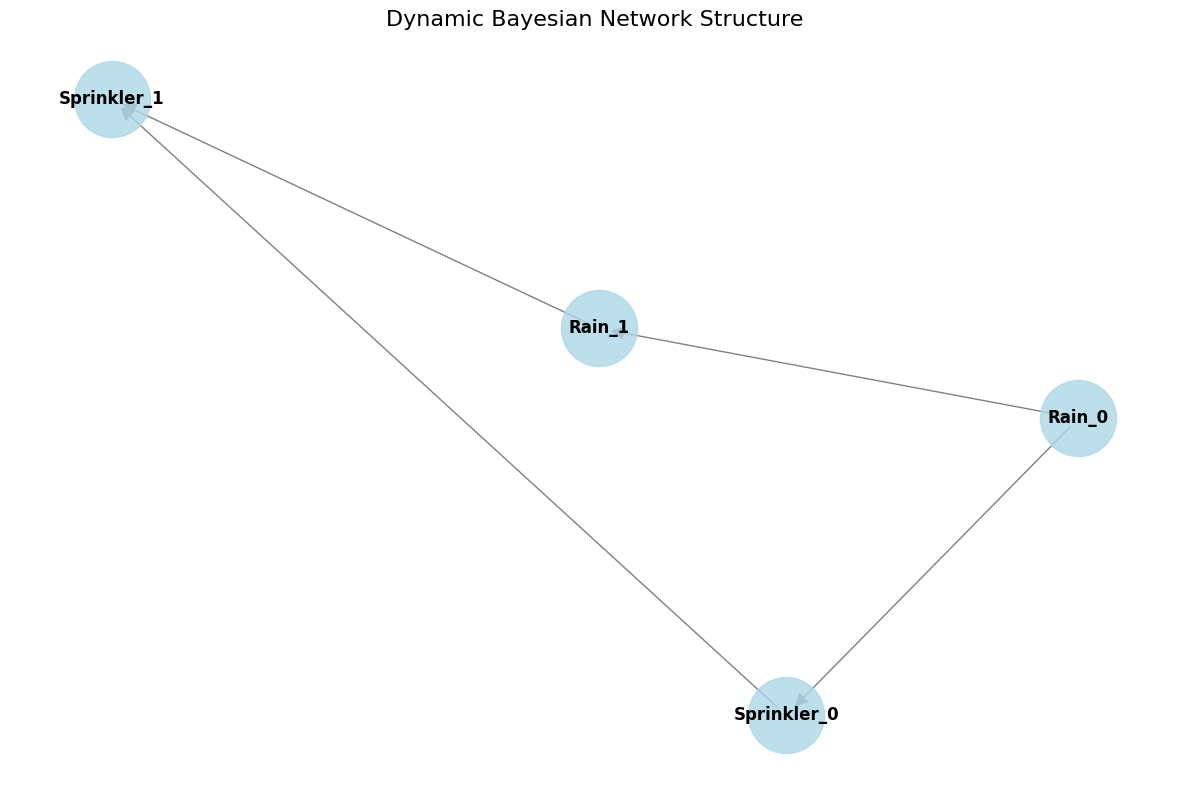

In [ ]:
#@title # **`Exercise 4: Visualizing the DBN`**

# Objective: Create a visual representation of the DBN structure.

def visualize_dbn(dbn):
    # Create a new graph
    G = nx.DiGraph()

    # Add nodes and edges from the DBN
    for node in dbn.nodes():
        G.add_node(f"{node[0]}_{node[1]}")
    for edge in dbn.edges():
        G.add_edge(f"{edge[0][0]}_{edge[0][1]}", f"{edge[1][0]}_{edge[1][1]}")

    # Set up the plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)

    # Add a title
    plt.title("Dynamic Bayesian Network Structure", fontsize=16)

    # Remove axis
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Visualize the DBN
visualize_dbn(dbn)

The extended Dynamic Bayesian Network has been successfully created and is valid.

Probability of ('WetGrass', 1) given evidence {('Rain', 0): 0, ('Sprinkler', 0): 1, ('WetGrass', 0): 1}:
[0.0259 0.9741]

The probability that the grass will be wet in the next time step is 0.97
The probability that the grass will not be wet in the next time step is 0.03


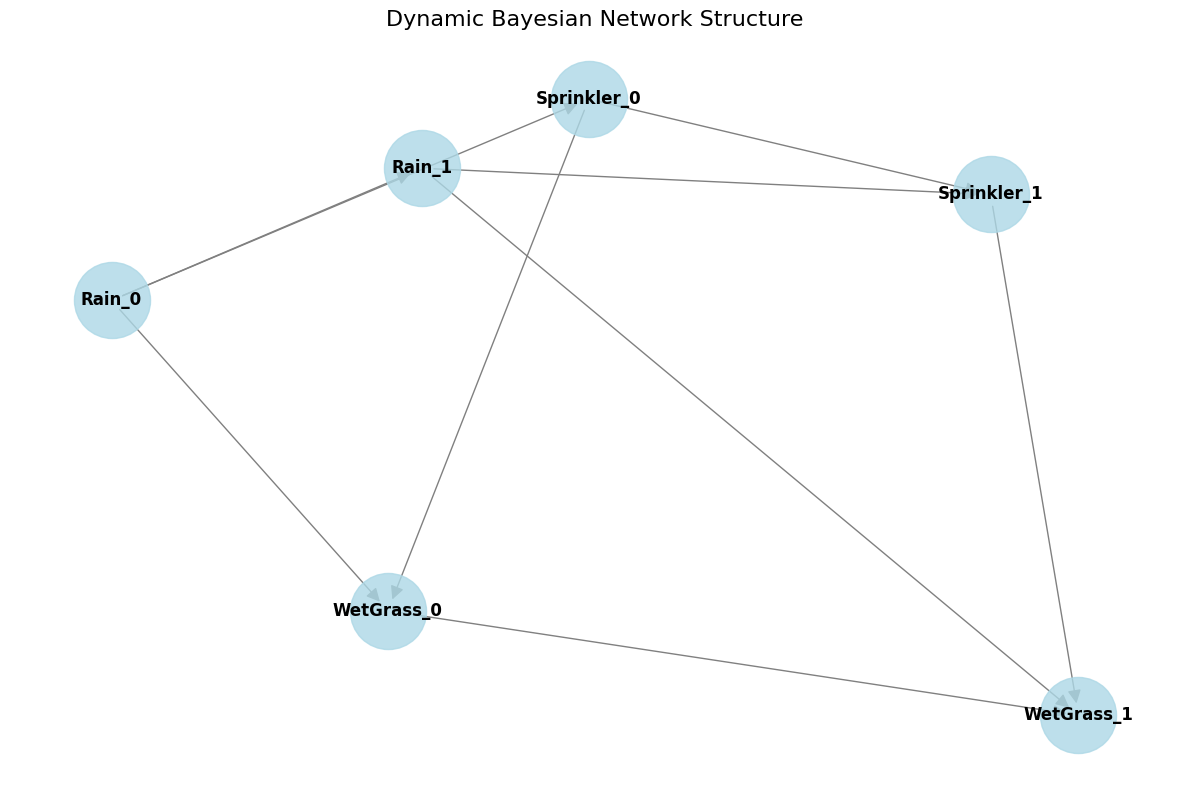

In [ ]:
#@title # **`Exercise 5: Extending the DBN`**

# Objective: Modify the DBN to include additional variables, such as WetGrass.

# Create an extended DBN
extended_dbn = DynamicBayesianNetwork()

# Add nodes to the extended model
extended_dbn.add_nodes_from(['Rain', 'Sprinkler', 'WetGrass'])

# Add edges (intra-time and inter-time dependencies)
extended_dbn.add_edges_from([
    (('Rain', 0), ('Sprinkler', 0)),
    (('Rain', 0), ('WetGrass', 0)),
    (('Sprinkler', 0), ('WetGrass', 0)),
    (('Rain', 0), ('Rain', 1)),
    (('Sprinkler', 0), ('Sprinkler', 1)),
    (('WetGrass', 0), ('WetGrass', 1)),
    (('Rain', 1), ('WetGrass', 1)),
    (('Sprinkler', 1), ('WetGrass', 1))
])

# Define CPTs (reusing some from before and adding new ones)
rain_cpt = TabularCPD(('Rain', 0), variable_card=2, values=[[0.8], [0.2]])

sprinkler_cpt = TabularCPD(('Sprinkler', 0), variable_card=2,
                           values=[[0.9, 0.4], [0.1, 0.6]],
                           evidence=[('Rain', 0)], evidence_card=[2])

wetgrass_cpt = TabularCPD(('WetGrass', 0), variable_card=2,
                          values=[[1.0, 0.1, 0.1, 0.01],
                                  [0.0, 0.9, 0.9, 0.99]],
                          evidence=[('Rain', 0), ('Sprinkler', 0)],
                          evidence_card=[2, 2])

rain_t1_cpt = TabularCPD(('Rain', 1), variable_card=2,
                         values=[[0.7, 0.3], [0.3, 0.7]],
                         evidence=[('Rain', 0)], evidence_card=[2])

sprinkler_t1_cpt = TabularCPD(('Sprinkler', 1), variable_card=2,
                              values=[[0.8, 0.3, 0.6, 0.1],
                                      [0.2, 0.7, 0.4, 0.9]],
                              evidence=[('Rain', 1), ('Sprinkler', 0)],
                              evidence_card=[2, 2])

wetgrass_t1_cpt = TabularCPD(('WetGrass', 1), variable_card=2,
                             values=[[0.9, 0.1, 0.1, 0.01, 0.8, 0.0, 0.0, 0.0],
                                     [0.1, 0.9, 0.9, 0.99, 0.2, 1.0, 1.0, 1.0]],
                             evidence=[('Rain', 1), ('Sprinkler', 1), ('WetGrass', 0)],
                             evidence_card=[2, 2, 2])

# Add CPTs to the extended model
extended_dbn.add_cpds(rain_cpt, sprinkler_cpt, wetgrass_cpt, rain_t1_cpt, sprinkler_t1_cpt, wetgrass_t1_cpt)

# Check if the extended model is valid
if extended_dbn.check_model():
    print("The extended Dynamic Bayesian Network has been successfully created and is valid.")
else:
    print("There is an issue with the extended Dynamic Bayesian Network model.")

# Perform inference on the extended DBN
extended_dbn_inf = DBNInference(extended_dbn)

# Query the extended DBN
evidence = {('Rain', 0): 0, ('Sprinkler', 0): 1, ('WetGrass', 0): 1}  # 0: False, 1: True
query_variable = ('WetGrass', 1)

# Perform inference
result = extended_dbn_inf.forward_inference([query_variable], evidence)

# Print and interpret the results
print(f"\nProbability of {query_variable} given evidence {evidence}:")
print(result[query_variable].values)

prob_wetgrass = result[query_variable].values[1]
print(f"\nThe probability that the grass will be wet in the next time step is {prob_wetgrass:.2f}")
print(f"The probability that the grass will not be wet in the next time step is {1-prob_wetgrass:.2f}")

# Visualize the extended DBN
visualize_dbn(extended_dbn)